<a href="https://colab.research.google.com/github/B-Murali-Krishna/NYC_Taxi_Trip_Time_Prediction--Capstone_Project/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings; warnings.simplefilter('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## Data Loading

In [4]:
data= pd.read_csv("/content/drive/MyDrive/Alma Better/AlmaBetter CapstoneProject/NYC Taxi Time Prediction Project/NYC Taxi Data.csv")

In [5]:
data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


So we have 1458644 rows and 11 columns.

4 categorical type and rest are numerical type.

In [7]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Great no Null Values.

In [8]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

##Feature Creation

In [9]:
data['pickup_weekday']=data['pickup_datetime'].dt.day_name()
data['dropoff_weekday']=data['dropoff_datetime'].dt.day_name()
data['pickup_weekday_num']=data['pickup_datetime'].dt.weekday
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['month']=data['pickup_datetime'].dt.month

In [10]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3


Finding Distance by using pickup_lat,pickup_long,dropoff_lat,dropoff_long values

In [11]:
from geopy.distance import great_circle

In [12]:
def find_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start=(pickup_lat,pickup_long)
 end=(dropoff_lat,dropoff_long)
 
 return great_circle(start,end).km

In [13]:
data['distance'] = data.apply(lambda x: find_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [14]:
data.trip_duration.head()

0     455
1     663
2    2124
3     429
4     435
Name: trip_duration, dtype: int64

Now we can find speed

In [15]:
data['speed'] = (data.distance/(data.trip_duration/3600))

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_weekday      1458644 non-null  object        
 12  dropoff_weekday     1458644 non-null  object        
 13  pickup_weekd

In [17]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [18]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)

In [19]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1,6.385108,10.822216,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4,1.485501,12.465739,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3,1.188590,9.836608,Afternoon


## Univariate Analysis

### Trip Duration

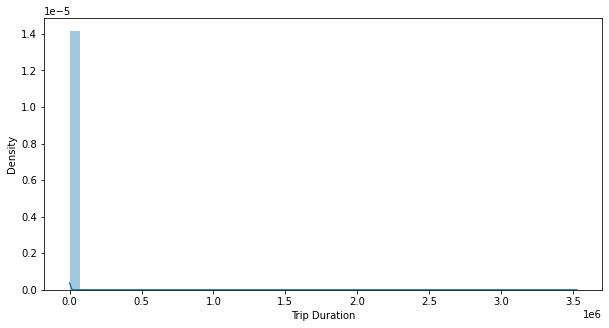

In [20]:
#plotting target variable trip duration
plt.figure(figsize = (10,5))
sns.distplot(data['trip_duration'])
plt.xlabel('Trip Duration')
plt.show()

Since trip duration looks skewed we can apply log10 tomake it normal distribution

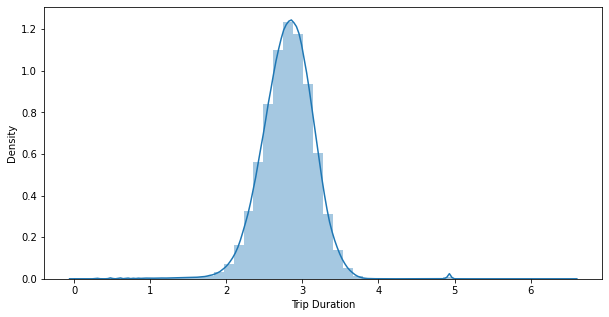

In [21]:
plt.figure(figsize = (10,5))
sns.distplot(np.log10(data['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

Finding outliers

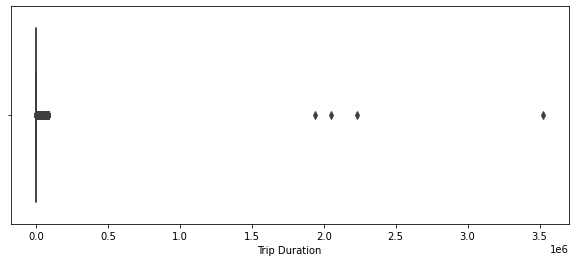

In [22]:
plt.figure(figsize = (10,4))
sns.boxplot(data.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

In [23]:
  duration= data['trip_duration'].values

In [24]:
duration=np.sort(duration)

In [25]:
print('0 percentile value is ',duration.min())

0 percentile value is  1


In [26]:
print('100 percentile value is',duration.max())

100 percentile value is 3526282


In [27]:
for i in range(0,100,5):
  duration= data['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print('100 percentile value is',duration.max())

0 percentile value is 1
5 percentile value is 180
10 percentile value is 245
15 percentile value is 298
20 percentile value is 348
25 percentile value is 397
30 percentile value is 446
35 percentile value is 496
40 percentile value is 548
45 percentile value is 603
50 percentile value is 662
55 percentile value is 727
60 percentile value is 798
65 percentile value is 877
70 percentile value is 968
75 percentile value is 1075
80 percentile value is 1208
85 percentile value is 1383
90 percentile value is 1634
95 percentile value is 2104
100 percentile value is 3526282


In [28]:
for i in range(95,100):
  duration= data['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


100 percentile value is clearly out of range

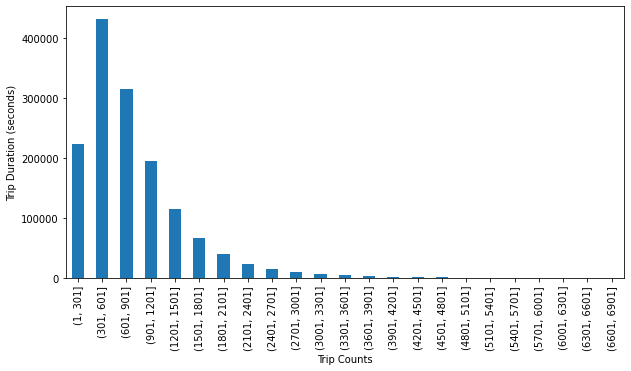

In [29]:
# No.of trips taken in periods of 5 min gaps
plt.figure(figsize = (10,5))
data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(1,7200,300))).count().plot(kind='bar')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

There are very few trips which have duration greater than 4800 seconds.

we should get rid of data having trip duration greater than 4800 seconds and also trip duration less than 60 seconds)

In [30]:
data = data[data.trip_duration <= 4800]
data = data[data.trip_duration >= 60]

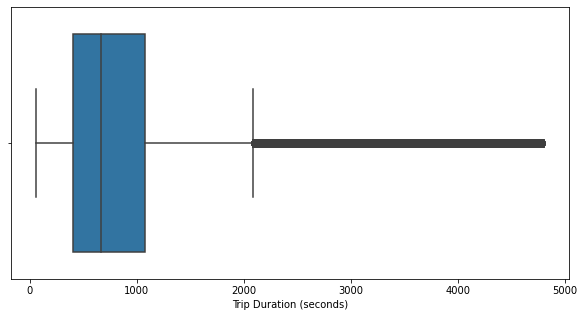

In [31]:
plt.figure(figsize = (10,5))
sns.boxplot(data.trip_duration)
plt.xlabel('Trip Duration (seconds)')
plt.show()

*   We can observe that most of the trips took 0 - 30 mins (2000 seconds) to complete

### Trips per Time of Day

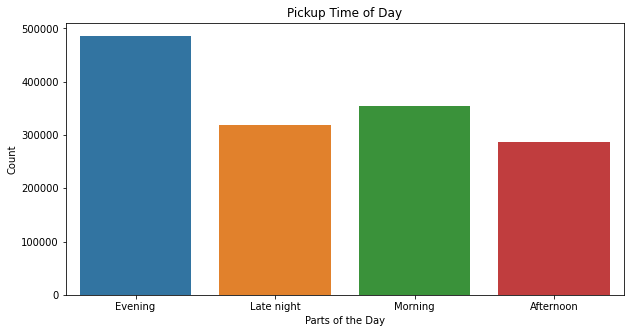

In [32]:
plt.figure(figsize = (10,5))
sns.countplot(x="pickup_timeofday",data=data)
plt.title('Pickup Time of Day')
plt.xlabel('Parts of the Day')
plt.ylabel('Count')
plt.show()

* Seems like evenigs have the most number of trips

### Vendor ID

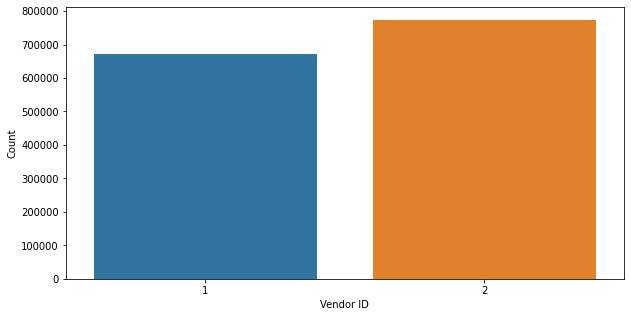

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(data.vendor_id)
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.show()

* Not very much great difference

### Passenger Count

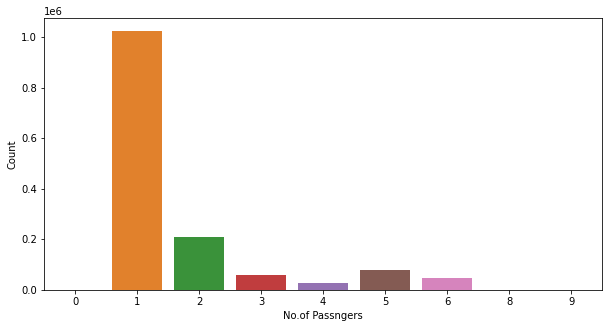

In [34]:
plt.figure(figsize = (10,5))
sns.countplot(x='passenger_count',data=data)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

* Let us remove the rows which have 0 or greater than 6 passenger count

In [35]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

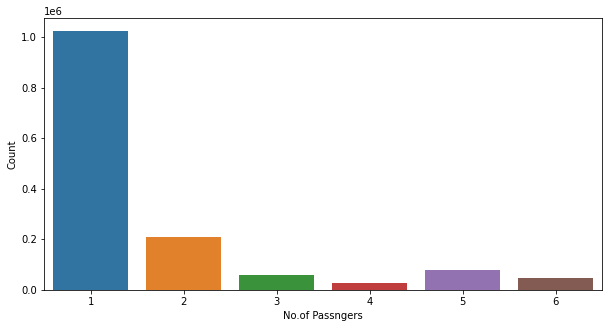

In [36]:
plt.figure(figsize = (10,5))
sns.countplot(x='passenger_count',data=data)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

* Wee can see that highest amount of trips were taken by single passengers

### Store and Forward Flag

In [37]:
data['store_and_fwd_flag'].value_counts()

N    1437924
Y       7846
Name: store_and_fwd_flag, dtype: int64

In [38]:
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994573
Y    0.005427
Name: store_and_fwd_flag, dtype: float64

*   We can see that only about 1% of the trip details were stored in the vehicle memory first

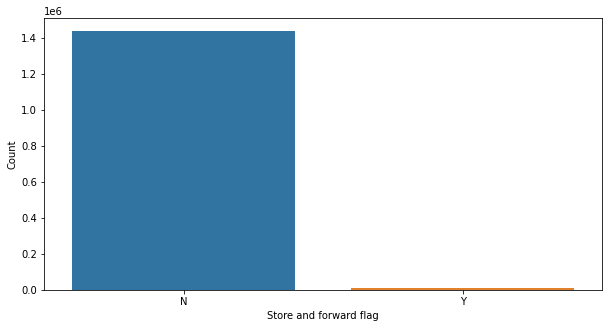

In [39]:
plt.figure(figsize = (10,5))
sns.countplot(x='store_and_fwd_flag',data=data)
plt.ylabel('Count')
plt.xlabel('Store and forward flag')
plt.show()

### Distance

In [40]:
distance= data['distance'].values
distance= np.sort(distance, axis= None)

In [41]:
for i in range(0,100,10):
  distance= data['distance'].values
  distance= np.sort(distance, axis= None)
  print("{} percentile value is {}".format(i, distance[int(len(distance)*(float(i)/100))]))
print('100 percentile value is',distance.max())

0 percentile value is 0.0
10 percentile value is 0.8093061824130643
20 percentile value is 1.1026472610520168
30 percentile value is 1.39058872417481
40 percentile value is 1.716615188182333
50 percentile value is 2.103475699940145
60 percentile value is 2.6056675665794966
70 percentile value is 3.343154788968105
80 percentile value is 4.61962459854144
90 percentile value is 7.593696297990768
100 percentile value is 1240.9104296218293


In [42]:
for i in range(90,100):
  distance= data['distance'].values
  distance= np.sort(distance, axis= None)
  print("{} percentile value is {}".format(i, distance[int(len(distance)*(float(i)/100))]))
print('100 percentile value is',distance.max())

90 percentile value is 7.593696297990768
91 percentile value is 8.207780822339672
92 percentile value is 8.841237389244656
93 percentile value is 9.4106389538407
94 percentile value is 10.015202848603936
95 percentile value is 10.90093839508433
96 percentile value is 12.59665017604999
97 percentile value is 15.069118743415903
98 percentile value is 19.11293911352718
99 percentile value is 20.711628319423614
100 percentile value is 1240.9104296218293


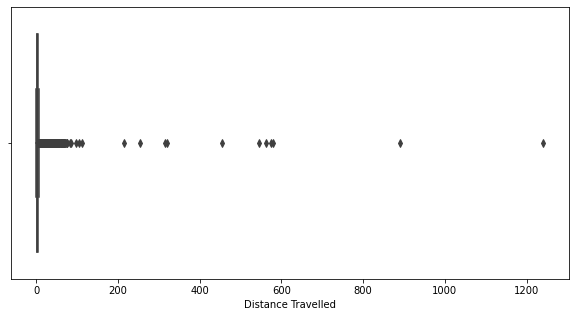

In [43]:
plt.figure(figsize = (10,5))
sns.boxplot(data.distance)
plt.xlabel('Distance Travelled')
plt.show()

* Since we removed the data having greater than 80 min(4800sec) so we can remove the distance travelled > 100 km, and we seen that 99 percentile of the distance travelled is about 24 km

In [44]:
data = data[data.distance <= 100]
data = data[data.distance >=1 ]

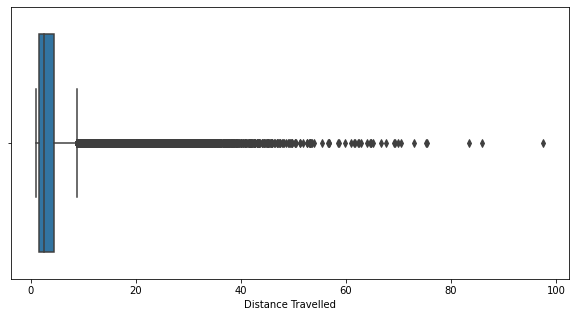

In [45]:
plt.figure(figsize = (10,5))
sns.boxplot(data.distance)
plt.xlabel('Distance Travelled')
plt.show()

### Speed

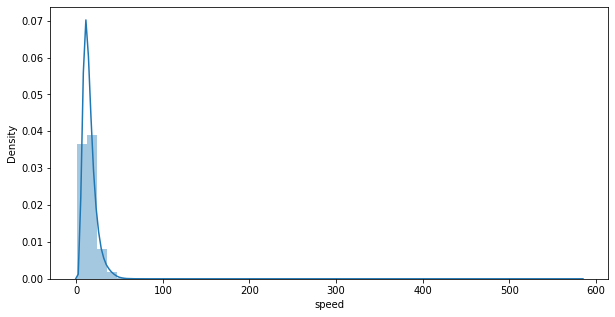

In [46]:
plt.figure(figsize = (10,5))
sns.distplot(data['speed'])
plt.xlabel('speed')
plt.show()

We can see that most of the speed ranges between 0 to 100 kmph

In [47]:
for i in range(0,100,5):
  speed= data['speed'].values
  speed= np.sort(speed, axis= None)
  print("{} percentile value is {}".format(i, speed[int(len(speed)*(float(i)/100))]))
print('100 percentile value is',speed.max())

0 percentile value is 0.7774622981972946
5 percentile value is 6.123078820561964
10 percentile value is 7.359069366433507
15 percentile value is 8.303554643948322
20 percentile value is 9.1244285537377
25 percentile value is 9.882297511300653
30 percentile value is 10.609765370790797
35 percentile value is 11.319329124081843
40 percentile value is 12.03176513232204
45 percentile value is 12.771327732602993
50 percentile value is 13.545938012292265
55 percentile value is 14.363268420760068
60 percentile value is 15.260577604607917
65 percentile value is 16.25167563096324
70 percentile value is 17.36250761520031
75 percentile value is 18.678093539350968
80 percentile value is 20.27957843604638
85 percentile value is 22.329769048727904
90 percentile value is 25.265542856507846
95 percentile value is 30.36110606966675
100 percentile value is 583.7351372418125


In [48]:
for i in range(95,100):
  speed= data['speed'].values
  speed= np.sort(speed, axis= None)
  print("{} percentile value is {}".format(i, speed[int(len(speed)*(float(i)/100))]))
print('100 percentile value is',speed.max())

95 percentile value is 30.36110606966675
96 percentile value is 32.03197998942145
97 percentile value is 34.1432325670317
98 percentile value is 37.05719430091841
99 percentile value is 41.501279136766
100 percentile value is 583.7351372418125


Now we can remove the data having speed greater than 50kmph(over speed is not legal) and less than 1kmph

In [49]:
data = data[data.speed <= 50]
data = data[data.speed >=1]

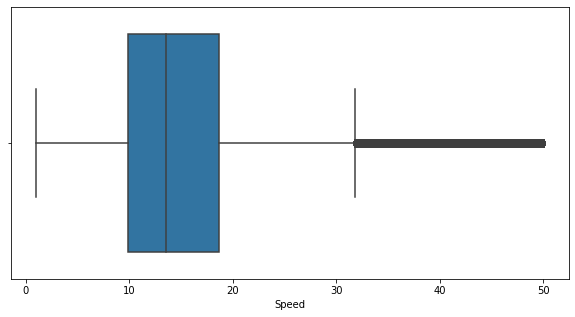

In [50]:
plt.figure(figsize = (10,5))
sns.boxplot(data.speed)
plt.xlabel('Speed')
plt.show()

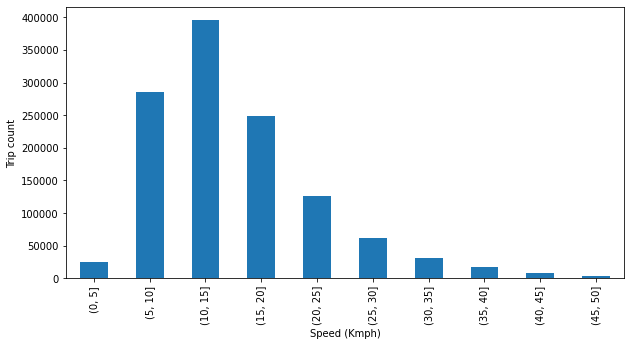

In [52]:
plt.figure(figsize = (10,5))
data.speed.groupby(pd.cut(data.speed, np.arange(0,55,5))).count().plot(kind ='bar')
plt.ylabel('Trip count')
plt.xlabel('Speed (Kmph)')
plt.show()

*   Mostly trips are done at a speed range of 5-25 kmph.


### Trips per Hour

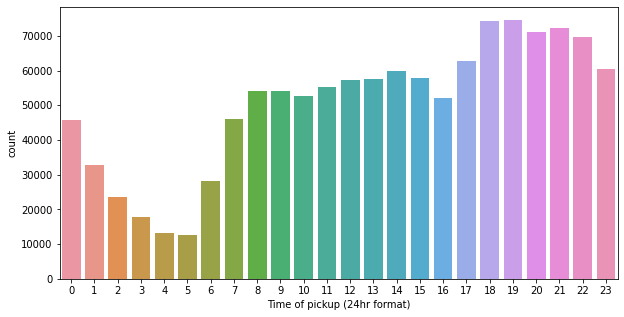

In [53]:
plt.figure(figsize = (10,5))
sns.countplot(data.pickup_hour)
plt.xlabel('Time of pickup (24hr format)')
plt.show()

### Trips per week day

In [59]:
data.pickup_weekday.value_counts()

Saturday     184396
Friday       183799
Thursday     180067
Wednesday    172609
Tuesday      166384
Sunday       164670
Monday       154261
Name: pickup_weekday, dtype: int64

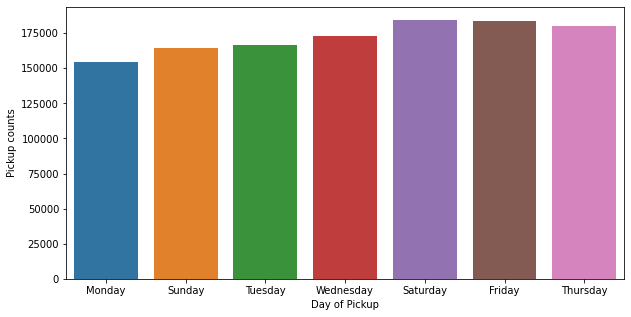

In [54]:
plt.figure(figsize = (10,5))
sns.countplot(data.pickup_weekday)
plt.xlabel('Day of Pickup')
plt.ylabel('Pickup counts')
plt.show()

### Trips per month

In [58]:
data.month.value_counts()

3    212276
4    208444
5    206657
6    195063
2    194778
1    188968
Name: month, dtype: int64

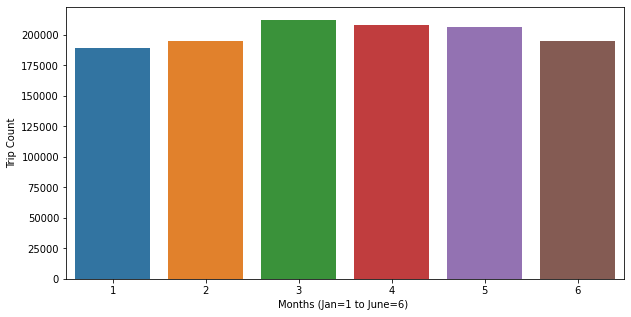

In [55]:
plt.figure(figsize = (10,5))
sns.countplot(data.month)
plt.ylabel('Trip Count')
plt.xlabel('Months (Jan=1 to June=6) ')
plt.show()